In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
image_w = 128
image_h = 128

X = []
y = []

In [2]:
for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.JPG")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
xy = (X_train, X_test, X_val, y_train, y_test, y_val)
np.save("C:/Users/ICT01_20/Desktop/food-8", xy)

print("ok", len(y))

갈치구이  파일 길이 :  700
갈치구이  :  C:/Users/ICT01_20/Desktop/food-5/갈치구이\Img_001_0000.jpg


KeyboardInterrupt: 

In [2]:
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
#np_load_old = np.load
#np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
#np.load = np_load_old

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-8.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(3639, 128, 128, 3)
3639


In [3]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [4]:
import keras
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'
                    ,kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8-1.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
keras.layers.LeakyReLU(alpha=0.3)

In [20]:
import keras
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:], activation='relu'
                    ,kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

ValueError: Unknown activation function:leaky_relu

In [4]:
import keras
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(moQdel_dir)
    
    model_path = model_dir + '/food-8-123.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3639 samples, validate on 1214 samples
Epoch 1/50




3639/3639 [==============================] - 15s 4ms/step - loss: 2.6060 - acc: 0.2872 - val_loss: 1.7232 - val_acc: 0.5041

Epoch 00001: val_loss improved from inf to 1.72323, saving model to ./test/food-8-123.model
Epoch 2/50
3639/3639 [==============================] - 12s 3ms/step - loss: 1.5170 - acc: 0.6021 - val_loss: 1.3968 - val_acc: 0.6532

Epoch 00002: val_loss improved from 1.72323 to 1.39678, saving model to ./test/food-8-123.model
Epoch 3/50
3639/3639 [==============================] - 12s 3ms/step - loss: 1.2556 - acc: 0.6804 - val_loss: 1.2120 - val_acc: 0.6944

Epoch 00003: val_loss improved from 1.39678 to 1.21196, saving model to ./test/food-8-123.model
Epoch 4/50
3639/3639 [==============================] - 12s 3ms/step - loss: 1.1492 - acc: 0.7153 - val_loss: 1.1304 - val_acc: 0.7282

Epoch 00004: val_loss im

3639/3639 [==============================] - 12s 3ms/step - loss: 0.6604 - acc: 0.9264 - val_loss: 0.8208 - val_acc: 0.8633

Epoch 00032: val_loss did not improve from 0.80385
Epoch 33/50
3639/3639 [==============================] - 12s 3ms/step - loss: 0.6866 - acc: 0.9195 - val_loss: 0.8573 - val_acc: 0.8731

Epoch 00033: val_loss did not improve from 0.80385
Epoch 34/50
3639/3639 [==============================] - 12s 3ms/step - loss: 0.6459 - acc: 0.9379 - val_loss: 0.7946 - val_acc: 0.8773

Epoch 00034: val_loss improved from 0.80385 to 0.79462, saving model to ./test/food-8-123.model
Epoch 35/50
3639/3639 [==============================] - 12s 3ms/step - loss: 0.6497 - acc: 0.9321 - val_loss: 0.7866 - val_acc: 0.8863

Epoch 00035: val_loss improved from 0.79462 to 0.78665, saving model to ./test/food-8-123.model
Epoch 36/50
3639/3639 [==============================] - 12s 3ms/step - loss: 0.6190 - acc: 0.9340 - val_loss: 0.8697 - val_acc: 0.8468

Epoch 00036: val_loss did not imp

In [13]:
import keras
from keras.layers import ELU
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],kernel_regularizer=keras.regularizers.l2(0.001))) 
    keras.layers.ELU(alpha=0.01)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    keras.layers.ELU(alpha=0.01)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    keras.layers.ELU(alpha=0.01)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
    keras.layers.ELU(alpha=0.01)
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8-123.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [6]:
import keras
from keras import layers
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization 
from keras.layers.normalization import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

AttributeError: '_TfDeviceCaptureOp' object has no attribute '_set_device_from_string'

In [5]:
import keras
from keras import layers
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization 
from keras.layers.normalization import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal')) 
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8-test1.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

AttributeError: '_TfDeviceCaptureOp' object has no attribute '_set_device_from_string'

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)       

In [8]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3639 samples, validate on 1214 samples
Epoch 1/50




3639/3639 [==============================] - 12s 3ms/step - loss: 4.9688 - acc: 0.4103 - val_loss: 4.2404 - val_acc: 0.3361

Epoch 00001: val_loss improved from inf to 4.24037, saving model to ./test/food-8-123.model
Epoch 2/50
3639/3639 [==============================] - 9s 3ms/step - loss: 1.9537 - acc: 0.6658 - val_loss: 2.8908 - val_acc: 0.5189

Epoch 00002: val_loss improved from 4.24037 to 2.89075, saving model to ./test/food-8-123.model
Epoch 3/50
3639/3639 [==============================] - 9s 3ms/step - loss: 1.8477 - acc: 0.7035 - val_loss: 2.7821 - val_acc: 0.5255

Epoch 00003: val_loss improved from 2.89075 to 2.78214, saving model to ./test/food-8-123.model
Epoch 4/50
3639/3639 [==============================] - 9s 3ms/step - loss: 1.6879 - acc: 0.7543 - val_loss: 2.6417 - val_acc: 0.5478

Epoch 00004: val_loss impro

In [9]:
# leakRelu 학습률 0.03 lose 0.8739 정확도 0.8641
# leakRelu 학습률 0.01 lose 0.87221 정확도 0.8517
#  층 추가 leakRelu 학습률 0.01 lose 0.78230 정확도 0.86 
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1214/1214 [==============================] - 1s 815us/step
정확도 : 0.6301


In [10]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1214/1214 [==============================] - 1s 809us/step
정확도 : 0.6301


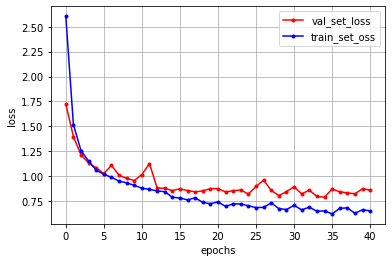

In [6]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [12]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-8-test123.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

C:\Users\ICT01_20\Anaconda3\envs\a\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


[1.000 0.000 0.000 0.000 0.000]
0
[1.000 0.000 0.000 0.000 0.000] 해당 이미지는 갈치구이로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000]
4
[0.000 0.000 0.000 0.000 1.000] 해당 이미지는 삼계탕로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000]
3
[0.000 0.000 0.000 1.000 0.000] 해당 이미지는 메추리알장조림로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000]
2
[0.000 0.000 1.000 0.000 0.000] 해당 이미지는 고사리나물로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000]
3
[0.000 0.000 0.000 1.000 0.000] 해당 이미지는 메추리알장조림로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000]
4
[0.000 0.000 0.000 0.000 1.000] 해당 이미지는 삼계탕로 추정됩니다.


In [8]:
categories

['갈치구이',
 '계란찜',
 '고사리나물',
 '메추리알장조림',
 '삼계탕',
 '소세지볶음',
 '애호박볶음',
 '오징어채볶음',
 '제육볶음',
 '콩자반']

In [7]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-8-123.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
0
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 갈치구이로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000]
6
[0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000] 해당 이미지는 애호박볶음로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000]
7
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 해당 이미지는 오징어채볶음로 추정됩니다.


In [1]:
# ----------------------------------------------------------
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
#np_load_old = np.load
#np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
#np.load = np_load_old

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-10.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(4013, 128, 128, 3)
4013


In [2]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [3]:
import keras
from keras.layers import ELU
from keras.layers import BatchNormalization , LeakyReLU
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal')) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-10.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
__________

In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4013 samples, validate on 1338 samples
Epoch 1/50




4013/4013 [==============================] - 16s 4ms/step - loss: 7.5723 - acc: 0.2539 - val_loss: 2.7609 - val_acc: 0.3849

Epoch 00001: val_loss improved from inf to 2.76094, saving model to ./test/food-10.model
Epoch 2/50
4013/4013 [==============================] - 13s 3ms/step - loss: 2.3311 - acc: 0.5325 - val_loss: 2.1155 - val_acc: 0.6046

Epoch 00002: val_loss improved from 2.76094 to 2.11551, saving model to ./test/food-10.model
Epoch 3/50
4013/4013 [==============================] - 13s 3ms/step - loss: 1.9712 - acc: 0.6262 - val_loss: 1.9798 - val_acc: 0.6076

Epoch 00003: val_loss improved from 2.11551 to 1.97984, saving model to ./test/food-10.model
Epoch 4/50
4013/4013 [==============================] - 13s 3ms/step - loss: 1.7607 - acc: 0.6666 - val_loss: 1.7171 - val_acc: 0.6786

Epoch 00004: val_loss improved fr

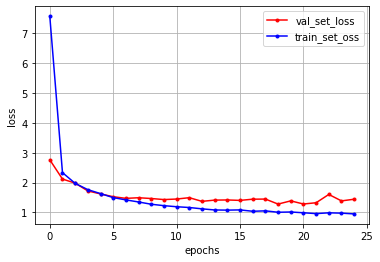

In [6]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [2]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
print(categories)
image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-10.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

['캡처1.PNG', '캡처10.PNG', '캡처11.PNG', '캡처12.PNG', '캡처2.PNG', '캡처4.PNG', '캡처5.PNG', '캡처8.PNG', '캡처9.PNG']
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
3
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 메추리알장조림로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
3
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 메추리알장조림로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
0
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 갈치구이로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
2
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 고사리나물로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
7
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 해당 이미지는 오징어채볶음로 추정됩니다.
[0.000 